In [69]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from statistics import mean
from fractions import Fraction as fr
import matplotlib.pyplot as plt
from random import choices
import warnings
warnings.filterwarnings("ignore")

In [70]:
Traindata_df = pd.read_csv('/content/train_data.dat',header=None)
Testdata_df = pd.read_csv('/content/test_data.dat',header=None)


In [71]:
Traindata_df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,5,-1.000,-1.000,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
1,3,-1.000,-1.000,-1.000,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
2,3,-1.000,-1.000,-1.000,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
3,3,-1.000,-1.000,-1.000,-1.000,-1.000,-0.104,0.549,0.579,0.579,...,0.388,0.579,0.811,1.000,1.000,0.715,0.107,-0.526,-1.000,-1.0
4,3,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.107,1.000,1.000,...,-0.280,0.322,0.813,1.000,1.000,0.633,-0.144,-0.994,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,3,-1.000,-0.882,-0.334,0.267,0.333,0.749,1.000,1.000,1.000,...,0.968,1.000,1.000,1.000,0.809,0.325,-0.820,-1.000,-1.000,-1.0
1210,3,-0.985,-0.048,0.226,0.226,0.226,-0.355,-0.807,-1.000,-0.726,...,-0.307,-0.555,-0.555,-0.555,-0.556,-1.000,-1.000,-1.000,-1.000,-1.0
1211,3,-1.000,-1.000,-1.000,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1212,3,-1.000,-1.000,-1.000,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [72]:
Testdata_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.000,-0.593,0.700,1.000,1.000,1.000,1.000,0.853,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.000,0.264,0.532,-0.210,-0.746,-0.779,-1.000,-1.000,...,0.461,0.418,-0.057,-0.829,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
2,-1.0,-1.0,-0.983,0.662,-0.509,-1.000,-1.000,-1.000,-1.000,-1.000,...,0.774,1.000,0.802,0.513,0.009,-0.603,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.000,-0.941,-0.120,0.858,1.000,1.000,1.000,0.698,...,0.841,1.000,0.823,0.203,-0.478,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.000,-1.000,-0.933,0.461,0.779,0.584,0.584,0.584,...,1.000,0.857,0.371,-0.397,-0.949,-1.000,-1.000,-1.000,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.945,...,0.132,0.418,0.633,0.541,0.418,0.259,-0.625,-0.746,-0.883,-1.0
322,-1.0,-1.0,-1.000,-1.000,-1.000,-0.565,0.388,1.000,1.000,1.000,...,-0.634,-0.126,0.383,1.000,1.000,0.970,0.207,0.045,-0.967,-1.0
323,-1.0,-1.0,-1.000,-0.939,0.536,1.000,1.000,1.000,0.871,0.264,...,1.000,1.000,1.000,1.000,1.000,0.748,0.026,-0.827,-1.000,-1.0
324,-1.0,-1.0,-1.000,-0.885,-0.280,-0.411,-0.920,-0.920,-0.920,-0.920,...,0.389,1.000,1.000,1.000,0.868,-0.400,-0.998,-1.000,-1.000,-1.0


In [212]:
X= Traindata_df.iloc[0:1213,1:257]
Y= Traindata_df.iloc[0:1213,0]
X_test_file=Testdata_df[0:326]


In [74]:
X_test_file

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.000,-0.593,0.700,1.000,1.000,1.000,1.000,0.853,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.000,0.264,0.532,-0.210,-0.746,-0.779,-1.000,-1.000,...,0.461,0.418,-0.057,-0.829,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
2,-1.0,-1.0,-0.983,0.662,-0.509,-1.000,-1.000,-1.000,-1.000,-1.000,...,0.774,1.000,0.802,0.513,0.009,-0.603,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.000,-0.941,-0.120,0.858,1.000,1.000,1.000,0.698,...,0.841,1.000,0.823,0.203,-0.478,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.000,-1.000,-0.933,0.461,0.779,0.584,0.584,0.584,...,1.000,0.857,0.371,-0.397,-0.949,-1.000,-1.000,-1.000,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.945,...,0.132,0.418,0.633,0.541,0.418,0.259,-0.625,-0.746,-0.883,-1.0
322,-1.0,-1.0,-1.000,-1.000,-1.000,-0.565,0.388,1.000,1.000,1.000,...,-0.634,-0.126,0.383,1.000,1.000,0.970,0.207,0.045,-0.967,-1.0
323,-1.0,-1.0,-1.000,-0.939,0.536,1.000,1.000,1.000,0.871,0.264,...,1.000,1.000,1.000,1.000,1.000,0.748,0.026,-0.827,-1.000,-1.0
324,-1.0,-1.0,-1.000,-0.885,-0.280,-0.411,-0.920,-0.920,-0.920,-0.920,...,0.389,1.000,1.000,1.000,0.868,-0.400,-0.998,-1.000,-1.000,-1.0


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=15)


In [76]:
def theta_init(X):
    """ Initilazing weights for all the instances """
    #theta=np.ones((X.shape[0],1))
    #theta= theta*1/(X.shape[0])
    w = np.ones(len(X)) / len(X)
   
    return w

In [111]:
def generic_clf(Y_train, X_train, Y_test, X_test, clf,X_tst_file):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    pred_test_file= clf.predict(X_tst_file)
    return classified_err(pred_train, Y_train), \
           classified_err(pred_test, Y_test), pred_test_file

In [78]:
def classified_err(pred,Y):
    """ """
    return sum(pred != Y) / float(len(Y))


In [184]:
def calc_err(X,Y,theta,pred,n):
    """ calculates the error rate for the given model """
    err=classified_err(pred,Y)*theta
    err=np.sum(theta)
    return err

In [181]:
def theta_normalize(X,Y,theta,pred,alpha):
    """ """
    new_theta=np.zeros((len(Y),1))

    for i in range(len(Y)):
         if(pred[i] == Y[i]):
           theta[i]= float(theta[i])*np.exp(-alpha)
         else:
           theta[i]= float(theta[i])*np.exp(alpha)
         z=np.sum(theta)
    new_theta=theta/z  
   
    return new_theta 

In [82]:
def Gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

In [83]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, X):
    left,right,group = list(), list(),list()
    left_class=0
    right_class=0
    for row in X:
        if row[index] < value:
            left.append(row)
            left_class=row[-1]
        else:
            right.append(row)
            right_class=row[-1]
    group.append(left)
    group.append(right)

    if(left_class==0): 
			  left_class =  3  if right_class==5 else 5
    if(right_class==0): 
			  right_class = 3 if left_class==5 else 5

    return group,left_class,right_class

In [84]:
def convert(X,Y):
    X_list=X.values.tolist()
    X_new=[]
    i=0
    for row in X_list:
        row.append(Y[i])
        i=i+1
        X_new.append(row)
        
    return X_new
    

In [85]:
def decisionStump(X,Y):
  
  dataset= convert(X,Y)
  X=X.to_numpy()
  class_values = list(set(row[-1] for row in dataset))
  b_index, b_value, b_score, b_groups = 999, 999, 999, None
  for index in range(len(dataset[0])-1):
     for row in X:
         groups,left,right=test_split(index, row[index], dataset)
         gini = Gini_index(groups, class_values)
         if gini < b_score:
            b_index, b_value, b_score, b_groups = index, row[index], gini, groups
				  
	
  return {'index':b_index, 'value':b_value, 'groups':b_groups,'right':right,'left':left}

In [151]:
def prediction(node, row):
   
   if row[node['index']] < node['value']:
       if isinstance(node['left'], dict):
         return prediction(node['left'], row)
       else:
   		   return node['left']
   else:
       if isinstance(node['right'], dict):
         return prediction(node['right'], row)
       else:
         return node['right']
   

In [209]:
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train[1:], er_test[1:]]).T
    print(df_error)
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')


In [88]:
def convert2(M):
    for i in range(len(M)):
        if M[i] == 3:
           M[i]= 1
        elif M[i]==5:
          M[i]= -1
        elif M[i] == 1:
          M[i]= 3
        else:
          M[i]=5
    return M

In [193]:
def AdaBoost(X_tr,Y_tr,X_tst,Y_tst,theta,boosting_rounds,X_tst_file):
    """ Implements adaboost using decision stumps learned using the Gini index as the weak learners. """
    Y_tr=Y_tr.to_numpy()
    X3=X_tst_file.to_numpy()
    X4=X_tst.to_numpy()
    err=0
    alpha=0
    n_train, n_test = len(X_train), len(X_test)
    
    X_tr['weight']=theta
    pred_train,pred_test,pred_test_file_f=[np.zeros(n_train), np.zeros(n_test),np.zeros(n_test)]
    #clf = DecisionTreeClassifier(criterion='gini',max_depth = 1, random_state = 1)
    for round in range(boosting_rounds):
         pred_train_i=[]
         pred_test_i=[]
         pred_test_file=[]
         #clf.fit(X_tr, Y_tr, sample_weight = theta)
         #pred_train_i = clf.predict(X_tr)
         #pred_test_i = clf.predict(X_tst)
         #pred_test_file = clf.predict(X3)

         X1=X_tr.sample(len(X_tr),replace=True,weights=X_tr['weight'])
         X_tr.drop("weight", axis=1, inplace=True)
         X1.drop("weight", axis=1, inplace=True)
         
         classifier_base=decisionStump(X1,Y_tr)
         
         X2 = X_tr.to_numpy()
         
         for row in X2:
             pred_train_i.append(prediction(classifier_base, row))
         for row in X4:
             pred_test_i.append(prediction(classifier_base, row))
         for row in X3:
             pred_test_file.append(prediction(classifier_base, row))

         err=calc_err(X_tr,Y_tr,theta,pred_train_i,n_train)
         
         if err > 0.5:
            theta= theta_init(X_tr)
            X_tr['weight']=theta
         else:
            alpha= 0.5* np.log((1-err)/float(err))
            theta=theta_normalize(X_tr,Y_tr,theta,pred_train_i,alpha)
            X_tr['weight'] =theta
       # Add to prediction
         pred_train = [sum(x) for x in zip(pred_train, [x * alpha for x in convert2(pred_train_i)])]
         pred_test = [sum(x) for x in zip(pred_test,   [x * alpha for x in convert2(pred_test_i)])]
         pred_test_file_f = [sum(x) for x in zip(pred_test, [x * alpha for x in convert2(pred_test_file)])]
    
    pred_train, pred_test,pred_test_file_f = np.sign(pred_train), np.sign(pred_test),np.sign(pred_test_file_f)
   
    return  err, alpha, classified_err(pred_train, Y_tr), classified_err(pred_test, Y_test),pred_test_file
    

In [214]:
theta = theta_init(X_train)

er_train,er_test=list(),list()

clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
er_tr_d, er_tst_d,pred_test_file_sk= generic_clf(Y_train, X_train, Y_test, X_test,clf_tree,X_test_file)
er_train, er_test = [er_tr_d], [er_tst_d]

print("er_tr_d_sklearn",er_tr_d,"er_tst_d_sklearn",er_tst_d)
err,alpha,err_tr,err_tst,pred_test_file=AdaBoost(X_train,Y_train,X_test,Y_test,theta,200,X_test_file)
er_train.append(err_tr)
er_test.append(err_tst)
err,alpha,err_tr,err_tst,pred_test_file=AdaBoost(X_train,Y_train,X_test,Y_test,theta,250,X_test_file)
er_train.append(err_tr)
er_test.append(err_tst)
err,alpha,err_tr,err_tst,pred_test_file=AdaBoost(X_train,Y_train,X_test,Y_test,theta,300,X_test_file)
er_train.append(err_tr)
er_test.append(err_tst)

          0         1
0  0.442311  0.482311
1  0.342311  0.352311
2  0.242311  0.272311


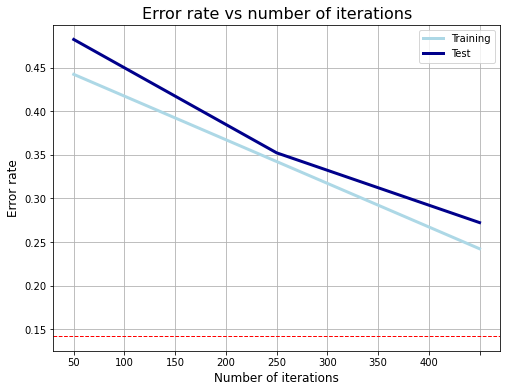

In [211]:

plot_error_rate(er_train, er_test)

In [215]:
"""writing the predicted data of skLearn adaboost algorithm using gini-index as decision stump model into output file """
with open("pred_test_gini.dat", "w") as a_file:
    for i in range(len(pred_test_file)):
        a_file.write(str(int(float(pred_test_file[i]))))
        a_file.write('\n')

In [159]:
"""writing the predicted data of skLearn adaboost algorithm without using gini-index as decision stump model into output file """
with open("pred_test_decision.dat", "w") as a_file:
    for i in range(len(pred_test_file)):
        a_file.write(str(int(float(pred_test_file[i]))))
        a_file.write('\n')

In [216]:
"""writing the predicted data of skLearn Decision tree classifier model into output file """
with open("pred_test_sk.dat", "w") as a_file:
    for i in range(len(pred_test_file_sk)):
        a_file.write(str(int(float(pred_test_file_sk[i]))))
        a_file.write('\n')